In [ ]:
import pandas as pd
import numpy as np

#Connecting to the Google Drive.
from google.colab import drive
drive.mount('/content/drive')

#Reading the data.
url = '/content/drive/MyDrive/Colab Notebooks/Dataset.csv'
df=pd.read_csv(url)
# df._get_value(0 , 'A')

df

Mounted at /content/drive


,A,B
0,0.14300,0.98493
1,-0.30467,0.98562
2,0.46625,-0.84003
3,0.94847,0.37222
4,-0.96871,-0.26697
...,...,...
995,4.48210,-7.40030
996,-3.49630,8.63860
997,6.10620,-5.98640
998,-7.40940,-5.52050


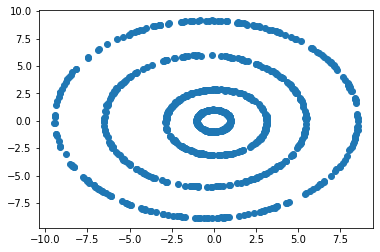

In [ ]:
#Plotting the original Graph
import matplotlib.pyplot as plt
plt.scatter(df['A'], df['B'])

In [ ]:
#Initialization
def Initialization(df,Z, k):
  import random
  centroid = []
  # print(Z)
  for i in range(k):
    r = random.randint(0,999)
    Z[r] = i+1
    centroid.append(df.iloc[r])
    # print(r)
  return Z , centroid

In [ ]:
def EuclideanDist (A , B):
  return np.sqrt(np.sum((A - B)**2))

In [ ]:
def CalculateMean(centroid ,Z ,k):
    centroid = np.zeros((k,2))
    Times = np.zeros(k)
    for i in range(len(df)):
      for j in range(k):
        if Z[i] == (j+1):
          centroid[j] = np.add(centroid[j], df.iloc[i])
          Times[j] = Times[j] + 1
    for j in range(k):
      centroid[j] = np.multiply(centroid[j] , 1 / Times[j])
    return centroid


In [ ]:
def Reassignment(centroid , Z , k):
  isReassign = False
  for i in range(len(df)):
    if Z[i] == 0 or Z[i] > k:
      dist = float(np.Inf)
    else:
      dist = EuclideanDist(centroid[(int(Z[i]) - 1)], df.iloc[i])
    for j in range(k):
      ED  = EuclideanDist(centroid[j] , df.iloc[i])
      if dist > ED:
        isReassign = True
        dist = ED
        Z[i] = j+1
  return Z ,isReassign

In [ ]:
def PlotGraph(k,df,Z):
  colour = ['Red', 'Green' , 'Cyan' , 'Black' , 'Blue']
  import matplotlib.pyplot as plt
  # print(colour)
  Plot =  []
  for i in range(0,k):
    Plot1 = []
    for j in range(len(df)):
      if Z[j] == i+1:
        Plot1.append(df.iloc[j])
    Plot1 = pd.DataFrame(Plot1)
    # print(Plot1)
    plt.title('K Means Clustering')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.scatter(Plot1['A'] , Plot1['B'],color=colour[i])

In [ ]:
def ComputeError(Z , centroid, k):
  sum = 0
  for i in range(len(df)):
    for j in range(0,k):
      if Z[i] == j+1:
        sum = sum + EuclideanDist(df.iloc[i], centroid[j])
  return sum

In [ ]:
def PlotError(ErrorSum):
  Iter = []
  for i in range(len(ErrorSum)):
    Iter.append(i)
  plt.scatter(Iter,ErrorSum)
  plt.title('Error v/s Iteration')
  plt.xlabel('Error')
  plt.ylabel('No of Iterations')
  plt.show()

In [ ]:
def CalculateIndicator(centroid, ind):
  Z = np.zeros(len(df))
  for i in range(len(df)):
    for j in range(ind):
      if df.iloc[i][0] == centroid[j][0] and df.iloc[i][1] == centroid[j][1]:
        Z[i] = j+1

  return Z

In [ ]:
def Voronoi(Z, centroid, k):
  print(df.iloc[0][0])
  print(centroid[0])
  colour = ['Red', 'Green' , 'Cyan' , 'Black' , 'Blue']
  x = []
  y = []
  c = []
  i = -10
  while i < 8:
    j = -8
    while j < 11:
      dis = []
      for il in  range(k):
        arr = [i,j]
        dist = EuclideanDist(arr, centroid[il])
        dis.append(dis)
      ind = np.argmin(dis)
      x.append(i)
      y.append(j)
      c.append(ind)
      j = j + 0.05
    i = i + 0.05
  v=pd.DataFrame(list(zip(x,y,c)),columns=['X','Y','Z'])
  plt.scatter(v['X'][(v.Z==0)],v['Y'][v.Z==0],marker='o',color='r',label='Region1')
  plt.scatter(v['X'][(v.Z==1)],v['Y'][v.Z==1],marker='o',color='g',label='Region2')
  plt.scatter(v['X'][(v.Z==2)],v['Y'][v.Z==2],marker='o',color='b',label='Region3')
  plt.scatter(v['X'][(v.Z==3)],v['Y'][v.Z==3],marker='o',color='coral',label='Region4')
  plt.scatter(v['X'][(v.Z==4)],v['Y'][v.Z==4],marker='o',color='cyan',label='Region5')
  plt.legend(bbox_to_anchor=(1.05,0.6))

In [ ]:
def FixedInitCluster(Z, centroid , k):
  ErrorSum = []
  centroid=CalculateMean(centroid, Z , k)
  Z,reassign=Reassignment(centroid,Z,k)
  ErrorSum.append(ComputeError(Z, centroid , k))
  centroid=CalculateMean(centroid, Z , k)
  while reassign:
    Z , reassign = Reassignment(centroid, Z, k)
    ErrorSum.append(ComputeError(Z, centroid , k))
    centroid=CalculateMean(centroid, Z , k)
  PlotError(ErrorSum)
  Voronoi(Z, centroid, k)
  PlotGraph(k,df, Z)

In [ ]:
k = 4
ErrorSum = []
Z = np.zeros(len(df))
centroid = np.zeros(k)
centroid=CalculateMean(centroid, Z , k)
Z,reassign=Reassignment(centroid,Z,k)
ErrorSum.append(ComputeError(Z, centroid , k))
centroid=CalculateMean(centroid, Z , k)
itera = 0
while reassign and itera < 12:
  Z , reassign = Reassignment(centroid, Z, k)
  ErrorSum.append(ComputeError(Z, centroid , k))
  centroid=CalculateMean(centroid, Z , k)
  itera = itera + 1
PlotError(ErrorSum)
Voronoi(Z, centroid, k)
PlotGraph(k,df, Z)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
#Computing the fixed Initialization
k = 5
Fixedcentroid = np.zeros(k)
Z = np.zeros(len(df))
Z , Fixedcentroid = Initialization(df, Z, k)
centroid = np.zeros(k)
centroid = Fixedcentroid[:1]
#Running it for K = {2, 3, 4, 5}
for i in range(2, 6):
  centroid.append(Fixedcentroid[i-1])
  Z = CalculateIndicator(centroid, i)
  FixedInitCluster(Z, centroid, i)
  plt.show()